# Transformada de Fourier de Tempo Discreto - DTFT

A DTFT é o contrário da série de Fourier, que transforma uma entrada periódica contínua em um espectro discreto. A DTFT difere da transformada de Fourier ao aplicar-se a funções cuja variável independente é discreta (descontínua), e não contínua, como é o caso da transformada de Fourier. A DTFT não deve ser confundida com a transformada discreta de Fourier (DFT), que pode ser considerada como um seu caso especial, que aparece numa situação muito comum: quando a função original é periódica.

## **Definição**

Dado um conjunto discreto de números reais ou complexos: ${\displaystyle x[n],\;n\in \mathbb {Z} }$ (inteiros), a transformada de Fourier de tempo discreto de ${\displaystyle x[n]\,}$ é usualmente escrita:

$${\displaystyle X(\omega )=\sum _{n=-\infty }^{\infty }x[n]\,e^{-i\omega n}}$$

e sua inversa é dada por:

$${\displaystyle x[n] = \frac{1}{2\pi} \int_{2\pi} X(\omega) e^{jwn} \, d\omega} $$

OBS: $e^{jwn}$ é periodicamente repetido em $2\pi$ (para mesmo número de $n$)

### Condições de Existência:

* x[n] precisa ser absolutamente somável (Condição forte). Isto é:

$${\displaystyle \sum_{n=-\infty}^{\infty} |x[n]| < \infty}$$

* O sinal precisa ter energia finita (Condição fraca). Isto é:

$${\displaystyle \sum_{n=-\infty}^{\infty} |x[n]|^2 < \infty}$$

### Séries Mais Comuns (Finito de Amostras):

$${\displaystyle \sum_{n=0}^{N-1} n = \frac{1}{2}N(N-1)}$$

$${\displaystyle \sum_{n=0}^{N-1} n^2 = \frac{1}{6}N(N-1)(2N-1) }$$

$${\displaystyle \sum_{n=0}^{N-1} a^n = \frac{1-a^N}{1-a}}$$

### Séries Mais Comuns (Infinito de Amostras):

$${\displaystyle \sum_{n=0}^{\infty} a^n = \frac{1}{1-a}}$$

$${\displaystyle \sum_{n=0}^{\infty} n\cdot a^n = \frac{1}{(1-a)^2}}$$

### **Exercício  Feito 01**:
Realize a DTFT do sinal $x[n] = a^n u[n]$, onde $|a|<1$ e $u[n]$ é a função degrau discretizada.

$$u[n] = \left\{\begin{matrix} u[n] = 1 \, \text{, se n ≥ 0} \\ u[n] = 0 \, \text{, se n < 0} \end{matrix} \right.$$

* Primeira Parte - No domínio da frequência, ela converge?

$${\displaystyle \begin{align*} X(\omega ) &= \sum_{n=-\infty}^{\infty}x[n]\,e^{-i\omega n} \\ \, &= \sum_{n=-\infty}^{\infty}a^n u[n] \,e^{-i\omega n}  \\ \, &= \sum_{n=0 }^{\infty }a^n \,e^{-i\omega n} \\ \, &= \sum_{n=0 }^{\infty } \left( a \,e^{-i\omega} \right)^n \end{align*}}$$

Essa soma só será convergente se $a \,e^{-i\omega} < 1.$ Como vimos na definição do problema, $a<1$, mas qual o módulo de $e^{-i\omega}$?

* Relembrando:

$${\displaystyle e^{-i\omega} = \cos(\omega) + i\sin(\omega)}$$

O seu módulo é dado pela raiz quadrada da parte real ao quadrado mais a parte imaginária ao quadrado:

$${\displaystyle |e^{-i\omega}| = \sqrt{\cos(\omega)^2 + \sin(\omega)^2} = 1}$$

Logo, o sinal converge no domínio da frequência.

$${\displaystyle \begin{align*} X(\omega) &= \sum_{n=0}^{\infty} \left( a \,e^{-i\omega} \right)^n \\ \, &= \frac{1}{1 - a \,e^{-i\omega}} \end{align*}}$$

### EXEMPLO 01 - Visualizando um Sinal Constante Discreto:

Temos a seguinte situação:

$$ x[n] = cont.$$

Neste caso, a constante será igual a 1

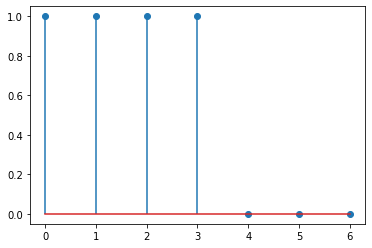

In [1]:
# Exemplo 01 - Sinal Constante Discreto :

import numpy as np
import matplotlib.pyplot as plt

# Criando um array no eixo n de inteiros:
n = np.array([0, 1, 2, 3, 4, 5, 6])

# Criando um array no eixo y - sinal contínuo:
y = np.array([1, 1, 1, 1, 0, 0, 0])

# Plotando o sinal o sinal:
plt.stem(n, y)

# Visualizando as imagens:
plt.show()

Pela Definicao da Transformada de Fourier de Tempo Discreta, a DTFT é uma transformada de Fourier que pode ser aplicada a qualquer função discreta. (OBS: Soma de uma Progressão Geométrica Finita)

$${\displaystyle \begin{align*} X(\omega ) &= \sum _{n=0}^{3} \,  1 \,  e^{-i\omega n} \\  \, &= \frac{1-e^{-i 4 \omega}}{1 - e^{-i\omega}} \\ \, &= e^{\frac{-i3 \omega}{2}} \frac{\sin(2 \omega)}{\sin(\omega/2)} \end{align*}}$$

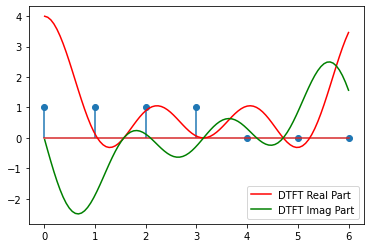

In [2]:
# Exemplo 01 - Sinal Contínuo Discreto:

import numpy as np
import matplotlib.pyplot as plt


n = np.array([0, 1, 2, 3, 4, 5, 6])              # Criando um array no eixo n de inteiros
w = np.linspace(0.01, 6, 100)                    # Criando um espaço na frequeência:
y = np.array([1, 1, 1, 1, 0, 0, 0])              # Criando um array no eixo y - sinal contínuo:
dtft = (1 - np.e**(-1j*w*4))/(1 - np.e**(-1j*w)) # Criando a visualização da DTFT:

# Plotando o sinal o sinal:
plt.stem(n, y)
plt.plot(w, dtft.real, label='DTFT Real Part', color='red')
plt.plot(w, dtft.imag, label='DTFT Imag Part', color='green')

# Colocando Legendas
plt.legend()

# Visualizando as imagens:
plt.show()

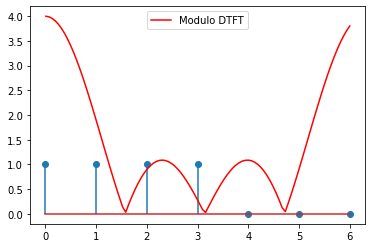

In [3]:
# Exemplo 01 - Sinal Contínuo Discreto:

import numpy as np
import matplotlib.pyplot as plt


n = np.array([0, 1, 2, 3, 4, 5, 6])              # Criando um array no eixo n de inteiros
w = np.linspace(0.01, 6, 100)                    # Criando um espaço na frequeência:
y = np.array([1, 1, 1, 1, 0, 0, 0])              # Criando um array no eixo y - sinal contínuo:
dtft = (1 - np.e**(-1j*w*4))/(1 - np.e**(-1j*w)) # Criando a visualização da DTFT:

# Plotando o sinal o sinal:
plt.stem(n, y)
plt.plot(w, abs(dtft), label='Modulo DTFT', color='red')

# Colocando Legendas
plt.legend()

# Visualizando as imagens:
plt.show()

### **Outra forma de VISUALIZAR o sinal - usando Python**

Como sabemos, a DTFT se repte no espaço de frequências com um período de $2 \cdot \pi$. Deste modo, podemos criar uma forma de representar o sinal na frequência:

* OBS 1: Esse método não é o mais eficiente, pois a DTFT é um processo de multiplicativo - onde entra valores discretos e saem funções contínuas.

* OBS 2: Esse método é custoso do ponto de vista de computação, pois é necessário calcular a DTFT para cada valor de $n * [w_1, w_2, ..., w_n]$.

* OBS 3: Esse método não preserva a escala na frequências.


In [4]:
import numpy as np

def DTFT(signal_array, freq_space):
    """
    Calcula a Transformada de Fourier de um sinal Discreto no Tempo.
    :param signal_array: Um array contendo todos os valores discretos do sinal.
    :param freq_space: Um array contendo os valores da frequência (Geralmente de 0 a 2*pi)
    """
    soma = 0                                                    # Criando variável soma.
    dtft_list = []                                              # Criando variável lista.
    for n, sinal_discreto in enumerate(signal_array):           # Laço for - para cada valor, um índice.
        soma += sinal_discreto * np.e ** (-1j * freq_space * n) # Cálculo da dtft para cada valor.
        dtft_list.append(soma)                                  # Adiciona DTFT na lista.
    dtft = [sum(elementos) for elementos in zip(*dtft_list)]    # Somando cada parcela de valor na freq.
    return np.array(dtft)

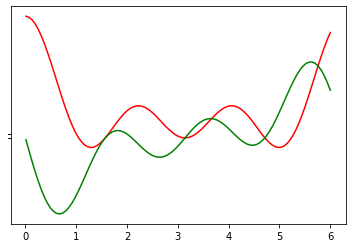

In [5]:
import numpy as np
import matplotlib.pyplot as plt

n = np.array([0, 1, 2, 3, 4, 5, 6])    # Criando um array no eixo n de inteiros
w = np.linspace(0.01, 6, 100)          # Criando um espaço na frequeência:
y = np.array([1, 1, 1, 1, 0, 0, 0])    # Criando um array no eixo y - sinal contínuo:
teste_funcao = DTFT(y, w)              # Testando a função definida acima

# Plotando a função:
plt.plot(w, teste_funcao.real, label='DTFT Real Part', color='red')
plt.plot(w, teste_funcao.imag, label='DTFT Imag Part', color='green')

# Visualizando as Imagens:
plt.yticks(y, labels="")               # Removendo a escala do eixo y
plt.show()

###  **Exercício para casa 01: Sinal Senoidal**

Temos a seguinte situação:

$$ x[n] = A \sin(\omega n + \psi)$$

Neste caso, a frequência da onda será igual a 4 Hz, a fase será igual a 0 e a amplitude será igual a 5. Utilize a função DTFT para visualizar o sinal e depois procure como realizar, passo a passo, a sua transformada de Fourier de Tempo Discreto.


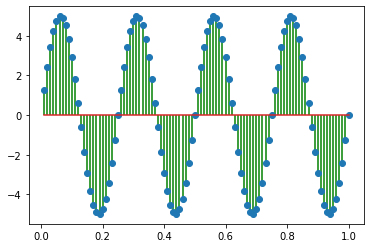

In [6]:
import numpy as np
import matplotlib.pyplot as plt

aplt = 5                             # Amplitude de Onda
freq = 4                             # Frequência (Hz)
psi = 0                              # Fase do sinal
w = 2*np.pi*freq                     # Velocidade angular (rad/s)
t = np.linspace(0.01, 1, 100)        # Definindo um array de tempo (s)
sin_signal = aplt*np.sin(w*t + psi)  # Sinal de onda - Seno

# Visualizando Amostragem no tempo:
plt.stem(t, sin_signal, 'green')     # Plotando seno - verde
plt.show()

## PROPRIEDADES DA TRANSFORMADA DE FOURIER DE TEMPO DISCRETO - DTFT

* **Linearidade**

$$ a \cdot x_1[n] + b \cdot x_2[n] \stackrel{DTFT}{\implies} a X(\omega) + bX(\omega)$$

**PROVA**:

$${\displaystyle \sum _{n=-\infty }^{\infty } \left(a \cdot x_1[n] + b \cdot x_2[n] \right) \,e^{-i\omega n} = \sum _{n=-\infty }^{\infty } a \cdot x_1[n]\,e^{-i\omega n} + \sum _{n=-\infty }^{\infty } b \cdot x_2[n] \,e^{-i\omega n} \implies a X(\omega) + bX(\omega)}$$

* **Deslocamento Tempo-Frequeência**

$$ x[n - n_0] \stackrel{DTFT}{\implies} e^{-jwn_0}X(\omega) $$

**PROVA**:

$${\displaystyle e^{-j\omega n_0}X(\omega) \implies e^{-j\omega n_0} \left( \sum _{n=-\infty }^{\infty } x[n] \,e^{-i\omega n} \right) = \sum _{n=-\infty }^{\infty } x[n] \,e^{-i\omega (n + n_0)}}$$

Com uma reindexação de $n \to n + n_0$:

$${\displaystyle \sum _{n=-\infty }^{\infty } x[n - n_0] \,e^{-i\omega (n)} \stackrel{DTFT}{=} x[n - n_0]}$$

* **Convolução**

$$ y[n] = x[n]*h[n] \implies Y(\omega) = X(\omega) H(\omega)$$

**PROVA**:

$${\displaystyle H(\nu )=\int _{\mathbb {R} ^{n}}f(x)\left(\int _{\mathbb {R} ^{n}}g(z-x)e^{-2\pi iz\cdot \nu }\,dz\right)\,dx.}$$

Substituindo-se ${\displaystyle y=z-x}$ então ${\displaystyle dy=dz}$:

$${\displaystyle H(\nu )=\int _{\mathbb {R} ^{n}}f(x)\left(\int _{\mathbb {R} }g(y)e^{-2\pi i(y+x)\cdot \nu }\,dy\right)\,dx}$$

$${\displaystyle =\int _{\mathbb {R} ^{n}}f(x)e^{-2\pi ix\cdot \nu }\left(\int _{\mathbb {R} ^{n}}g(y)e^{-2\pi iy\cdot \nu }\,dy\right)\,dx}$$

$${\displaystyle =\int _{\mathbb {R} ^{n}}f(x)e^{-2\pi ix\cdot \nu }\,dx\int _{\mathbb {R} ^{n}}g(y)e^{-2\pi iy\cdot \nu }\,dy.}$$

Essas duas integrais são as definições de ${\displaystyle F(\nu )}$ e ${\displaystyle G(\nu )}$, logo

$${\displaystyle H(\nu )=F(\nu )\cdot G(\nu )}$$